In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
train=pd.read_csv("data/Google_Stock_Price_Train.csv",index_col="Date")

In [3]:
train.head()

,Open,High,Low,Close,Volume
Date,,,,,
1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
train.index

Index(['1/3/2012', '1/4/2012', '1/5/2012', '1/6/2012', '1/9/2012', '1/10/2012',
       '1/11/2012', '1/12/2012', '1/13/2012', '1/17/2012',
       ...
       '12/16/2016', '12/19/2016', '12/20/2016', '12/21/2016', '12/22/2016',
       '12/23/2016', '12/27/2016', '12/28/2016', '12/29/2016', '12/30/2016'],
      dtype='object', name='Date', length=1258)

In [5]:
train.index = pd.to_datetime(train.index)

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


Text(0, 0.5, 'Open')

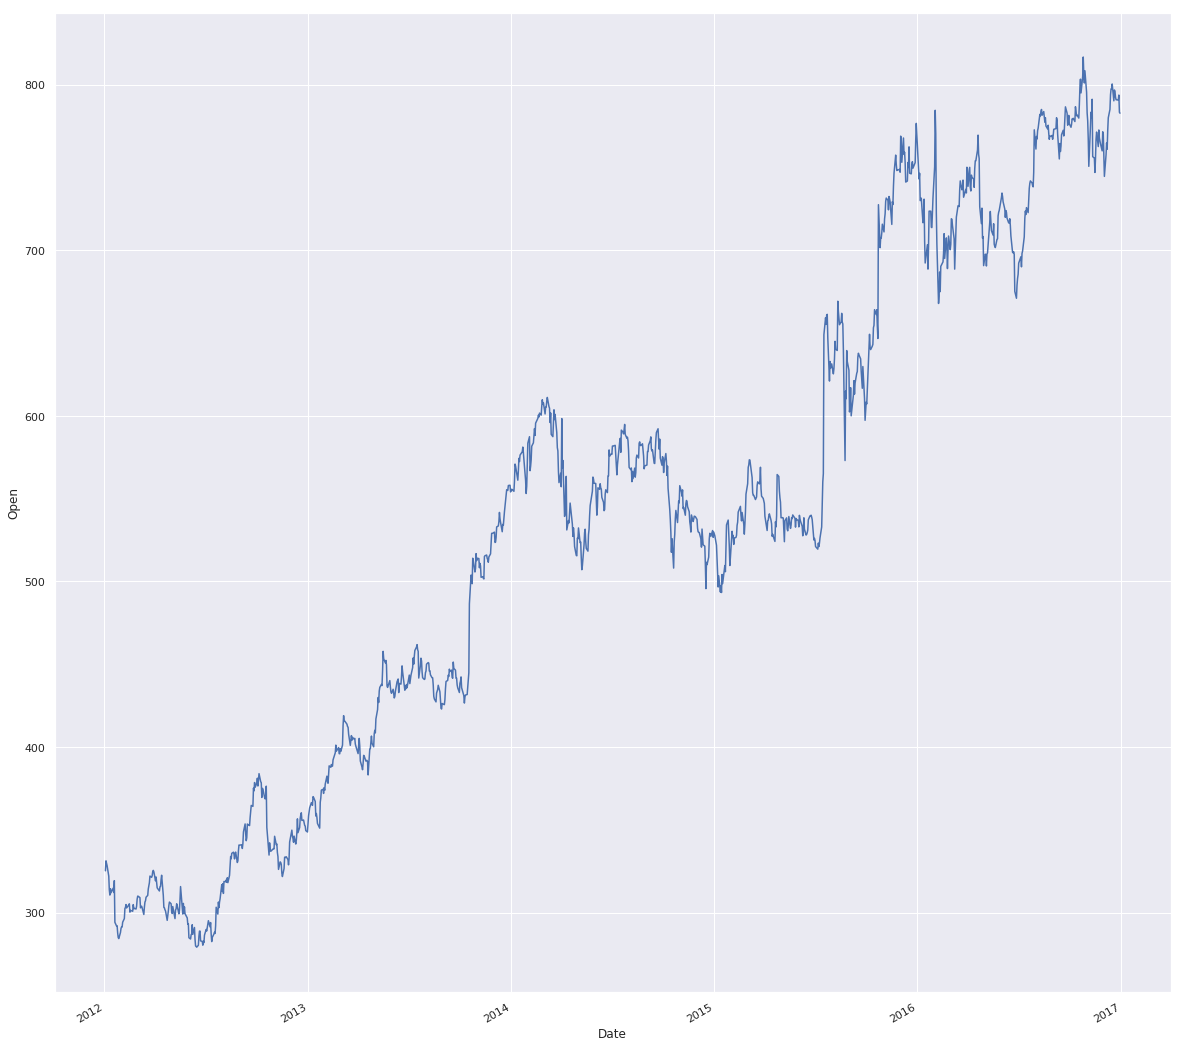

In [6]:
plt.figure(figsize=(20,20))
train.Open.plot()
plt.ylabel("Open")



In [7]:
train.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [8]:
train_set=train.iloc[:,0:1].values

In [9]:
train_norm=(train_set-train_set.min(axis=0))/(train_set.max(axis=0)-train_set.min(axis=0))

In [10]:
x_train=[]
y_train=[]

for i in range(60,1258):
    x_train.append(train_norm[i-60:i,0])
    y_train.append(train_norm[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

print("x_train shape :",x_train.shape)
print("y_train_shape :",y_train.shape)

x_train shape : (1198, 60)
y_train_shape : (1198,)


In [11]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [13]:
regressor =Sequential()

regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 50)            20200     
__________

In [15]:
regressor.compile(optimizer="adam",loss="mean_squared_error")

regressor.fit(x_train,y_train,epochs=100,batch_size=32)

regressor.save("lstm.h5")

Epoch 1/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0473
Epoch 2/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0066
Epoch 3/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0062
Epoch 4/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0060
Epoch 5/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0064
Epoch 6/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0057
Epoch 7/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0065
Epoch 8/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0048
Epoch 9/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0048
Epoch 10/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0045
Epoch 11/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0049
Epoch 12/100
1198/1198 [============================

1198/1198 [==============================] - 20s 16ms/step - loss: 0.0015
Epoch 96/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0016
Epoch 97/100
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0014


In [19]:
test=pd.read_csv("data/Google_Stock_Price_Test.csv",index_col="Date")
test.index = pd.to_datetime(test.index)
test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [24]:
dataset=pd.concat((train["Open"],test["Open"]),axis=0)


In [51]:
inputs=dataset[len(dataset)-len(test)-60:].values
inputs=inputs.reshape(-1,1)
inputs.shape

(80, 1)

In [59]:
test_norm=(inputs-train_set.min(axis=0))/(train_set.max(axis=0)-train_set.min(axis=0))

In [54]:
x_test=[]
for i in range(60,80):
    x_test.append(test_norm[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(20, 60, 1)

In [56]:
predict_stock_price=regressor.predict(x_test)
predict_stock_price=predict_stock_price*(train_set.max(axis=0)-train_set.min(axis=0))+train_set.min(axis=0)
predict_stock_price

array([[772.91016428],
       [769.98423759],
       [770.62467455],
       [772.23954462],
       [775.46326104],
       [781.1788117 ],
       [785.83675062],
       [786.72287853],
       [786.28526156],
       [786.14338369],
       [786.43816156],
       [786.71262539],
       [786.944795  ],
       [787.86463012],
       [789.06834915],
       [794.26566749],
       [801.44927602],
       [808.28338053],
       [810.72010412],
       [804.41012748]])

Text(0, 0.5, 'google stock price')

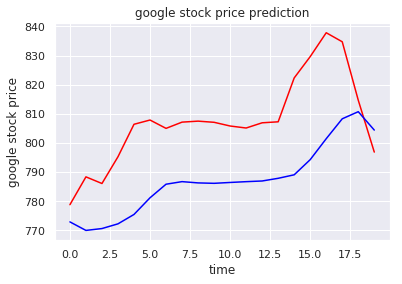

In [58]:
plt.plot(test.iloc[:,0:1].values,color="red",label="real google stock price")
plt.plot(predict_stock_price,color="blue",label="predicted google stock price")
plt.title("google stock price prediction")
plt.xlabel("time")
plt.ylabel("google stock price")